In [ ]:
import os
import pandas as pd 

nested_folder = './monitor_data'

# List the files in the nested folder
nested_files = os.listdir(nested_folder)
nested_files

['CPE4-data-2024-10-19 21_15_12.csv',
 'CPE1-data-2024-10-19 21_13_03.csv',
 'CPE1-data-2024-10-19 21_13_14.csv',
 'WiFi User Tx Failed Packets-data-2024-10-21 18_16_59.csv',
 'WiFi User Tx Failed Packets-data-2024-10-21 18_17_07.csv',
 'CPE2-data-2024-10-19 21_13_49.csv',
 'CPE1-data-2024-10-19 21_12_38.csv',
 'CPE4-data-2024-10-19 21_14_59.csv',
 '5G Cell Throughput-data-2024-10-21 18_16_07.csv',
 'CPE2-data-2024-10-19 21_13_34.csv',
 'WiFi User Signal Average-data-2024-10-21 18_18_07.csv',
 'CPE3-data-2024-10-19 21_14_38.csv',
 'CPE3-data-2024-10-19 21_14_26.csv',
 '5G Cell Temperature Sensors-data-2024-10-21 18_28_53.csv',
 'WiFi User Rx Bitrate-data-2024-10-21 18_18_23.csv',
 '5G Cell Temperature Sensors-data-2024-10-21 18_28_49.csv',
 'CPE4-data-2024-10-19 21_15_05.csv',
 'WiFi User Signal Average-data-2024-10-21 18_18_09.csv',
 'WiFi User Tx Failed Packets-data-2024-10-21 18_17_04.csv',
 'WiFi User Tx Failed Packets-data-2024-10-21 18_17_03.csv',
 'CPE2-data-2024-10-19 21_13_29.

In [2]:
import re
# 循环遍历文件夹中的每个文件
duplicate_report = []

for filename in os.listdir(nested_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(nested_folder, filename)
        
        # 读取 CSV 文件到 DataFrame
        try:
            data = pd.read_csv(file_path)
            
            # 检查是否有 'Time' 列
            if 'Time' in data.columns:
                # 将 'Time' 列转换为 datetime 类型
                data['Time'] = pd.to_datetime(data['Time'], errors='coerce')
                
                # 查找重复的时间戳
                duplicates = data[data.duplicated(subset='Time', keep=False)]
                
                # 如果有重复的时间戳，记录这些文件的情况
                if not duplicates.empty:
                    duplicate_report.append({
                        'Filename': filename,
                        'Number of Duplicate Rows': len(duplicates)
                    })
        except Exception as e:
            # 如果读取文件失败，记录错误信息
            duplicate_report.append({
                'Filename': filename,
                'Error': str(e)
            })

# 打印报告
if duplicate_report:
    duplicate_report_df = pd.DataFrame(duplicate_report)
    print(duplicate_report_df)
else:
    print("No duplicate timestamps found in any file.")

No duplicate timestamps found in any file.


In [3]:
# Correcting the filtering logic for WiFi and LiFi file paths
cpe_files = [f for f in nested_files if 'CPE' in f]
cell_5g_files = [f for f in nested_files if '5G' in f]
wifi_files = [f for f in nested_files if 'WiFi' in f ]
lifi_files = [f for f in nested_files if 'LiFi' in f ]

# Verify that the corrected file lists are populated
cpe_files, cell_5g_files, wifi_files, lifi_files

(['CPE4-data-2024-10-19 21_15_12.csv',
  'CPE1-data-2024-10-19 21_13_03.csv',
  'CPE1-data-2024-10-19 21_13_14.csv',
  'CPE2-data-2024-10-19 21_13_49.csv',
  'CPE1-data-2024-10-19 21_12_38.csv',
  'CPE4-data-2024-10-19 21_14_59.csv',
  'CPE2-data-2024-10-19 21_13_34.csv',
  'CPE3-data-2024-10-19 21_14_38.csv',
  'CPE3-data-2024-10-19 21_14_26.csv',
  'CPE4-data-2024-10-19 21_15_05.csv',
  'CPE2-data-2024-10-19 21_13_29.csv',
  'CPE4-data-2024-10-19 21_14_54.csv',
  'CPE4-data-2024-10-19 21_15_25.csv',
  'CPE4-data-2024-10-19 21_15_19.csv',
  'CPE2-data-2024-10-19 21_13_42.csv',
  'CPE3-data-2024-10-19 21_14_31.csv',
  'CPE3-data-2024-10-19 21_14_10.csv',
  'CPE1-data-2024-10-19 21_13_09.csv'],
 ['5G Cell Throughput-data-2024-10-21 18_16_07.csv',
  '5G Cell Temperature Sensors-data-2024-10-21 18_28_53.csv',
  '5G Cell Temperature Sensors-data-2024-10-21 18_28_49.csv',
  '5G RMOD Power-data-2024-10-21 18_29_53.csv',
  '5G Cell Temperature Sensors-data-2024-10-21 18_28_51.csv',
  '5G Cell

In [4]:
# Function to preview the headers of a few files from each category to identify any discrepancies
def preview_headers(file_lists):
    headers_dict = {}
    for category, files in file_lists.items():
        category_headers = {}
        for file in files:
            data = pd.read_csv(os.path.join(nested_folder, file), nrows=0)  # Load only headers
            category_headers[file] = data.columns.tolist()
        headers_dict[category] = category_headers
    return headers_dict

# Creating a dictionary of file lists for each category to pass to the preview_headers function
file_lists = {
    "CPE": cpe_files[:3],  # Preview headers for the first three files of each category
    "5G": cell_5g_files[:3],
    "WiFi": wifi_files[:3],
    "LiFi": lifi_files[:3]
}

# Previewing the headers
previewed_headers = preview_headers(file_lists)
previewed_headers

{'CPE': {'CPE4-data-2024-10-19 21_15_12.csv': ['Time',
   'trans wlx00c0cab5c677 '],
  'CPE1-data-2024-10-19 21_13_03.csv': ['Time', 'recv wwan0'],
  'CPE1-data-2024-10-19 21_13_14.csv': ['Time', 'trans wwan0 ']},
 '5G': {'5G Cell Throughput-data-2024-10-21 18_16_07.csv': ['Time',
   'Total 5G Cell Uplink Traffic'],
  '5G Cell Temperature Sensors-data-2024-10-21 18_28_53.csv': ['Time',
   'payload_data_bbmod1_temp3 5G'],
  '5G Cell Temperature Sensors-data-2024-10-21 18_28_49.csv': ['Time',
   'payload_data_bbmod1_temp1 5G']},
 'WiFi': {'WiFi User Tx Failed Packets-data-2024-10-21 18_16_59.csv': ['Time',
   'payload_data_details_txFailed {Aptech="wifi", mac_address="c8:3a:35:a0:05:fd"}'],
  'WiFi User Tx Failed Packets-data-2024-10-21 18_17_07.csv': ['Time',
   'payload_data_details_txFailed {Aptech="wifi", mac_address="c8:3a:35:ac:04:5d"}'],
  'WiFi User Signal Average-data-2024-10-21 18_18_07.csv': ['Time',
   'payload_data_details_signalAvg {Aptech="wifi", mac_address="c8:3a:35:a4:0

In [7]:
cpe_info_path = './CPEs info.csv'

# Load the CPEs info data to establish MAC address and interface mappings
cpe_info_data = pd.read_csv(cpe_info_path)
cpe_info_data

,CPE,Wifi_MAC_address,Lifi_MAC_address,5G_interface,wifi_interface,lifi_interface
0,CPE1,c8:3a:35:a0:05:fd,NaN,wwan0,wlxc83a35a005fd,NaN
1,CPE2,c8:3a:35:a4:07:0d,NaN,wwan0,wlxc83a35a4070d,NaN
2,CPE3,c8:3a:35:ac:04:5d,NaN,wwan0,wlxc83a35ac045d,NaN
3,CPE4,c8:3a:35:a4:06:9d,00:c0:ca:b5:c6:77,wwan0,wlxc83a35a4069d,wlx00c0cab5c677


In [8]:
# # Function to convert data rates to b/s
# def convert_to_bps(value):
#     number, unit = value.split()
#     number = float(number)
#     if unit == 'Mb/s':
#         return number   # Convert Mb/s to Mb/s
#     elif unit == 'kb/s':
#         return number / 1e3  # Convert kb/s to Mb/s
#     elif unit == 'b/s':
#         return number/ 1e6  # Already in Mb/s
    
# Function to convert data rates to Mb/s
def convert_to_bps(value):
    if isinstance(value, str):
        number, unit = value.split()
        number = float(number)
        if unit == 'Mb/s':
            return number   # Convert Mb/s to Mb/s
        elif unit == 'kb/s':
            return number / 1e3  # Convert kb/s to Mb/s
        elif unit == 'b/s':
            return number/ 1e6  # Already in Mb/s
    else:
        return None

CPE

In [9]:
#unit:bit/s
    
# Load and concatenate all CPE-related data
cpe_data_frames = pd.DataFrame()
for cpe_file in cpe_files:
    cpe_file_id = cpe_file.split('-')[0] 
    file_path = os.path.join(nested_folder, cpe_file)
    cpe_data = pd.read_csv(file_path)
    for col in cpe_data.columns:
        if 'recv' in col or 'trans' in col:  # Identify columns with data rates
            cpe_data[col] = cpe_data[col].apply(convert_to_bps)
    # Rename columns based on CPE info
    interface = cpe_data.columns[1].split(' ')[1]
    for index, row in cpe_info_data.iterrows():
        if str(row['CPE']) == cpe_file_id:
            for interface_type in ['5G_interface', 'wifi_interface', 'lifi_interface']:
                if interface == row[interface_type]:
                    old_name = row[interface_type]
                    new_name = f"{cpe_data.columns[1].split(' ')[0]}_{cpe_file_id}_{interface_type.split('_')[0]}"
                    cpe_data.rename(columns={cpe_data.columns[1]: new_name}, inplace=True)
    
    # Merge or concatenate data into one DataFrame
    if cpe_data_frames.empty:
        cpe_data_frames = cpe_data
    else:
        cpe_data_frames = pd.merge(cpe_data_frames, cpe_data, on='Time', how='outer')

# # Concatenate all CPE data into a single DataFrame
# combined_cpe_data = pd.concat(cpe_data_frames, ignore_index=True)

# Display the combined DataFrame to verify
cpe_data_frames.head(), cpe_data_frames.shape

(                  Time  trans_CPE4_lifi  recv_CPE1_5G  trans_CPE1_5G  \
 0  2024-10-18 20:21:00             2.12           0.0            0.0   
 1  2024-10-18 20:21:30             1.75           0.0            0.0   
 2  2024-10-18 20:22:00            20.90           0.0            0.0   
 3  2024-10-18 20:22:30            21.40           0.0            0.0   
 4  2024-10-18 20:23:00           100.00           0.0            0.0   
 
    trans_CPE2_5G  recv_CPE1_wifi  recv_CPE4_wifi  recv_CPE2_5G  trans_CPE3_5G  \
 0          48.30         0.92500        158.0000         0.384           4.71   
 1          46.80         0.80900        161.0000         0.306           5.05   
 2          11.10         0.00846         11.5000         0.206           5.54   
 3           9.76         0.78800          0.0116         0.190          14.00   
 4           7.39         0.89000          0.0108         0.167          32.40   
 
    recv_CPE3_5G  recv_CPE4_5G  recv_CPE2_wifi  recv_CPE4_lifi  tr

In [10]:
# Function to load and process each technology data
def process_technology_data(file_list, technology_name, folder_path):
    data_frames = pd.DataFrame()
    
    # Iterate through the list of files for the given technology
    for file in file_list:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        
        # Apply unit conversions if needed (e.g., for data rates, power, etc.)
        for col in df.columns:
            if 'Time' not in col:  # Exclude the Time column
                df[col] = df[col].apply(convert_to_bps) if 'bitrate' in col.lower() else df[col]
        
        # Rename columns to indicate the technology
        df.columns = [col if 'Time' in col else f"{col}_{technology_name}" for col in df.columns]
        
        # # Add the processed DataFrame to the list
        # data_frames.append(df)
            # Merge or concatenate data into one DataFrame
        if data_frames.empty:
            data_frames = df
        else:
            data_frames = pd.merge(data_frames, df, on='Time')
        
    # Concatenate all data for this technology
    return pd.concat(data_frames, ignore_index=True)

#5G

In [11]:
# Let's filter out the 5G Power in files and merge them together 
# unit: dBm

# Function to remove the unit (dBm) and convert the value to a float
def convert_dBm(value):
    if isinstance(value, str) and 'W' in value:
        return float(value.replace('W', '').strip())
    return value

# Identify the 5G Cell Temperature Sensor files
cell_5g_RMOD_files = [file for file in cell_5g_files if 'RMOD' in file]

cell_5g_RMOD_frames = pd.DataFrame()

for file in cell_5g_RMOD_files:
    
    file_path = os.path.join(nested_folder, file)
    cell_5g_RMOD_data = pd.read_csv(file_path)
    cell_5g_RMOD_data.iloc[:, 1] = cell_5g_RMOD_data.iloc[:, 1].apply(convert_dBm)           
    # Merge or concatenate data into one DataFrame
    if cell_5g_RMOD_frames.empty:
        cell_5g_RMOD_frames = cell_5g_RMOD_data
    else:
        cell_5g_RMOD_frames = pd.merge(cell_5g_RMOD_frames, cell_5g_RMOD_data, on='Time', how='outer')

cell_5g_RMOD_frames

,Time,payload_data_rmod_power 5G
0,2024-10-18 20:21:30,41.7
1,2024-10-18 20:22:00,41.7
2,2024-10-18 20:22:30,42.5
3,2024-10-18 20:23:00,42.5
4,2024-10-18 20:23:30,42.4
...,...,...
2854,2024-10-19 20:20:00,42.2
2855,2024-10-19 20:20:30,41.9
2856,2024-10-19 20:21:00,41.9
2857,2024-10-19 20:21:30,41.8


In [12]:
# Let's filter out the 5G Cell Temperature Sensor files and merge them together 
# unit: °C

# Function to remove the unit (°C) and convert the value to a float
def convert_temperature(value):
    if isinstance(value, str) and '°C' in value:
        return float(value.replace('°C', '').strip())
    return value

# Identify the 5G Cell Temperature Sensor files
temperature_sensor_files = [file for file in cell_5g_files if 'Temperature Sensors' in file]

temperature_sensor_frames = pd.DataFrame()

for file in temperature_sensor_files:
    
    file_path = os.path.join(nested_folder, file)
    temperature_sensor_data = pd.read_csv(file_path)
    for col in temperature_sensor_data.columns:
        if col != 'Time':
            temperature_sensor_data[col] = temperature_sensor_data[col].apply(convert_temperature)
            
    # Merge or concatenate data into one DataFrame
    if temperature_sensor_frames.empty:
        temperature_sensor_frames = temperature_sensor_data
    else:
        temperature_sensor_frames = pd.merge(temperature_sensor_frames, temperature_sensor_data, on='Time', how='outer')

temperature_sensor_frames

,Time,payload_data_bbmod1_temp3 5G,payload_data_bbmod1_temp1 5G,payload_data_bbmod1_temp2 5G
0,2024-10-18 20:21:30,61.5,64.8,45.6
1,2024-10-18 20:22:00,67.0,44.4,64.5
2,2024-10-18 20:22:30,52.4,54.8,65.8
3,2024-10-18 20:23:00,64.3,61.6,64.8
4,2024-10-18 20:23:30,59.6,53.2,62.4
...,...,...,...,...
2854,2024-10-19 20:20:00,65.5,52.7,53.0
2855,2024-10-19 20:20:30,46.8,63.7,63.1
2856,2024-10-19 20:21:00,63.8,44.1,46.8
2857,2024-10-19 20:21:30,54.2,64.3,53.5


In [13]:
# Let's filter out the 5G Throughtput files and merge them together 
# unit: bit/s

# Identify the 5G Cell Temperature Sensor files
throughtput_5g_files = [file for file in cell_5g_files if 'Throughput' in file]

throughtput_5g_frames = pd.DataFrame()
for file in throughtput_5g_files:
    file_path = os.path.join(nested_folder, file)
    throughtput_5g_data = pd.read_csv(file_path)
    throughtput_5g_data.iloc[:, 1] = throughtput_5g_data.iloc[:, 1].apply(convert_to_bps)
    # Merge or concatenate data into one DataFrame
    if throughtput_5g_frames.empty:
        throughtput_5g_frames = throughtput_5g_data
    else:
        throughtput_5g_frames = pd.merge(throughtput_5g_frames, throughtput_5g_data, on='Time', how='outer')

throughtput_5g_frames

,Time,Total 5G Cell Uplink Traffic,Total 5G Cell Downlink Traffic
0,2024-10-18 20:21:00,6.59,0.12
1,2024-10-18 20:21:30,55.8,0.624
2,2024-10-18 20:22:00,56.8,0.538
3,2024-10-18 20:22:30,16.9,0.222
4,2024-10-18 20:23:00,22.6,0.387
...,...,...,...
2877,2024-10-19 20:19:30,5.23,0.0243
2878,2024-10-19 20:20:00,0.000301,0.00023
2879,2024-10-19 20:20:30,0.000041,0.0
2880,2024-10-19 20:21:00,0.77,0.0199


In [14]:
cell_5g_frames = pd.merge(temperature_sensor_frames, throughtput_5g_frames, on='Time', how='outer')
cell_5g_frames = pd.merge(cell_5g_frames, cell_5g_RMOD_frames, on='Time', how='outer')
cell_5g_frames

,Time,payload_data_bbmod1_temp3 5G,payload_data_bbmod1_temp1 5G,payload_data_bbmod1_temp2 5G,Total 5G Cell Uplink Traffic,Total 5G Cell Downlink Traffic,payload_data_rmod_power 5G
0,2024-10-18 20:21:00,NaN,NaN,NaN,6.59,0.12,NaN
1,2024-10-18 20:21:30,61.5,64.8,45.6,55.8,0.624,41.7
2,2024-10-18 20:22:00,67.0,44.4,64.5,56.8,0.538,41.7
3,2024-10-18 20:22:30,52.4,54.8,65.8,16.9,0.222,42.5
4,2024-10-18 20:23:00,64.3,61.6,64.8,22.6,0.387,42.5
...,...,...,...,...,...,...,...
2878,2024-10-19 20:20:00,65.5,52.7,53.0,0.000301,0.00023,42.2
2879,2024-10-19 20:20:30,46.8,63.7,63.1,0.000041,0.0,41.9
2880,2024-10-19 20:21:00,63.8,44.1,46.8,0.77,0.0199,41.9
2881,2024-10-19 20:21:30,54.2,64.3,53.5,24.7,0.252,41.8


wifi

In [15]:
import re
def rename_columns_wifi_lifi(columns_id):
    # Rename columns based on CPE info
    mac_address = re.search(r'mac_address="([^"]+)"', columns_id).group(1)
    metric_name = re.search(r'payload_data_details_(\w+)', columns_id).group(1)
    for index, row in cpe_info_data.iterrows():
        if row['Wifi_MAC_address'] == mac_address:
            return f"{metric_name}_{row['CPE']}_WiFi"
        elif row['Lifi_MAC_address'] == mac_address:
            return f"{metric_name}_{row['CPE']}_LiFi"

In [16]:
# Let's filter out the wifi Inactivity Time in files and merge them together 
# unit: ms

# Function to remove the unit (ms) and convert the value to a float
def convert_ms(value):
    if isinstance(value, str) and 'ms' in value:
        return float(value.replace('ms', '').strip())
    return value

# Identify the 5G Cell Temperature Sensor files
Inativity_time_files = [file for file in wifi_files if 'Inactivity Time' in file]

Inativity_time_frames = pd.DataFrame()

for file in Inativity_time_files:
    
    file_path = os.path.join(nested_folder, file)
    Inativity_time_data = pd.read_csv(file_path)
    Inativity_time_data.rename(columns={Inativity_time_data.columns[1]: rename_columns_wifi_lifi(Inativity_time_data.columns[1])}, inplace=True)
    Inativity_time_data.iloc[:, 1] = Inativity_time_data.iloc[:, 1].apply(convert_ms)           
    # Merge or concatenate data into one DataFrame
    if Inativity_time_frames.empty:
        Inativity_time_frames = Inativity_time_data
    else:
        Inativity_time_frames = pd.merge(Inativity_time_frames, Inativity_time_data, on='Time', how='outer')

Inativity_time_frames

,Time,inactiveTime_CPE3_WiFi,inactiveTime_CPE1_WiFi,inactiveTime_CPE2_WiFi,inactiveTime_CPE4_WiFi
0,2024-10-18 20:21:30,25.3,6.67,6.17,4.33
1,2024-10-18 20:22:00,15.7,136.0,2.33,10.0
2,2024-10-18 20:22:30,3.33,100.0,3.33,76.7
3,2024-10-18 20:23:00,3.0,4.5,4.67,269.0
4,2024-10-18 20:23:30,3.67,4.67,5.57,109.0
...,...,...,...,...,...
2777,2024-10-19 20:19:30,10.0,3.17,5.0,273.0
2778,2024-10-19 20:20:00,179.0,0.5,3.65,257.0
2779,2024-10-19 20:20:30,2.57,0.857,4.8,307.0
2780,2024-10-19 20:21:30,194.0,142.0,224.0,130.0


In [17]:
# Let's filter out the wifi tx/rx files and merge them together 
# unit: bit/s

# Identify the 5G Cell Temperature Sensor files
WiFi_Tx_Rx_files = [file for file in wifi_files if 'Tx Bitrate' in file or 'Rx Bitrate' in file]

WiFi_Tx_Rx_frames = pd.DataFrame()
for file in WiFi_Tx_Rx_files:
    
    file_path = os.path.join(nested_folder, file)
    WiFi_Tx_Rx_data = pd.read_csv(file_path)
    WiFi_Tx_Rx_data.iloc[:, 1] = WiFi_Tx_Rx_data.iloc[:, 1].apply(convert_to_bps)        
    WiFi_Tx_Rx_data.rename(columns={WiFi_Tx_Rx_data.columns[1]: rename_columns_wifi_lifi(WiFi_Tx_Rx_data.columns[1])}, inplace=True) 
    # Merge or concatenate data into one DataFrame
    if WiFi_Tx_Rx_frames.empty:
        WiFi_Tx_Rx_frames = WiFi_Tx_Rx_data
    else:
        WiFi_Tx_Rx_frames = pd.merge(WiFi_Tx_Rx_frames, WiFi_Tx_Rx_data, on='Time', how='outer')

WiFi_Tx_Rx_frames

,Time,rxBytes_CPE1_WiFi,rxBytes_CPE4_WiFi,txBytes_CPE4_WiFi,txBytes_CPE2_WiFi,rxBytes_CPE2_WiFi,rxBytes_CPE3_WiFi,txBytes_CPE1_WiFi,txBytes_CPE3_WiFi
0,2024-10-18 20:21:30,39.2,0.000177,144.0,0.692,42.6,6.42,20.2,0.207
1,2024-10-18 20:22:00,24.2,0.000166,99.2,18.7,29.1,6.07,0.464,2.0
2,2024-10-18 20:22:30,33.3,0.000033,8.05,24.6,11.8,7.55,0.39,55.9
3,2024-10-18 20:23:00,50.9,0.000223,0.00961,49.2,13.5,20.8,0.694,121.0
4,2024-10-18 20:23:30,54.2,6.49,0.199,36.9,10.8,20.9,49.9,87.7
...,...,...,...,...,...,...,...,...,...
2777,2024-10-19 20:19:30,55.6,0.0,0.00878,120.0,1.92,89.1,88.6,6.05
2778,2024-10-19 20:20:00,98.4,0.00023,0.00948,132.0,0.164,0.163,0.00833,26.7
2779,2024-10-19 20:20:30,98.3,0.0,0.00855,97.8,0.163,0.166,0.00811,102.0
2780,2024-10-19 20:21:30,5.18,6.07,0.127,27.4,0.577,13.3,19.9,1.09


In [18]:
# Let's filter out the wifi Signal in files and merge them together 
# unit: dBm

# Function to remove the unit (ms) and convert the value to a float
def convert_ms(value):
    if isinstance(value, str) and 'dBm' in value:
        return float(value.replace('dBm', '').strip())
    return value

# Identify the 5G Cell Temperature Sensor files
wifi_signal_files = [file for file in wifi_files if 'Signal' in file]

wifi_signal_frames = pd.DataFrame()

for file in wifi_signal_files:
    
    file_path = os.path.join(nested_folder, file)
    wifi_signal_data = pd.read_csv(file_path)
    wifi_signal_data.rename(columns={wifi_signal_data.columns[1]: rename_columns_wifi_lifi(wifi_signal_data.columns[1])}, inplace=True)
    wifi_signal_data.iloc[:, 1] = wifi_signal_data.iloc[:, 1].apply(convert_ms)           
    # Merge or concatenate data into one DataFrame
    if wifi_signal_frames.empty:
        wifi_signal_frames = wifi_signal_data
    else:
        wifi_signal_frames = pd.merge(wifi_signal_frames, wifi_signal_data, on='Time', how='outer')

wifi_signal_frames

,Time,signalAvg_CPE2_WiFi,signalAvg_CPE3_WiFi,signalAvg_CPE1_WiFi,signalAvg_CPE4_WiFi
0,2024-10-18 20:21:10,112.0,113.0,111.0,119.0
1,2024-10-18 20:21:20,112.0,114.0,111.0,117.0
2,2024-10-18 20:21:30,112.0,114.0,110.0,116.0
3,2024-10-18 20:21:40,112.0,114.0,111.0,115.0
4,2024-10-18 20:21:50,112.0,114.0,110.0,115.0
...,...,...,...,...,...
7873,2024-10-19 20:21:20,112.0,112.0,110.0,112.0
7874,2024-10-19 20:21:30,112.0,113.0,110.0,112.0
7875,2024-10-19 20:21:40,112.0,113.0,110.0,112.0
7876,2024-10-19 20:21:50,112.0,113.0,110.0,112.0


In [19]:
wifi_frames = pd.merge(Inativity_time_frames, WiFi_Tx_Rx_frames, on='Time', how='outer')
wifi_frames = pd.merge(wifi_frames, wifi_signal_frames, on='Time', how='outer')
wifi_frames

,Time,inactiveTime_CPE3_WiFi,inactiveTime_CPE1_WiFi,inactiveTime_CPE2_WiFi,inactiveTime_CPE4_WiFi,rxBytes_CPE1_WiFi,rxBytes_CPE4_WiFi,txBytes_CPE4_WiFi,txBytes_CPE2_WiFi,rxBytes_CPE2_WiFi,rxBytes_CPE3_WiFi,txBytes_CPE1_WiFi,txBytes_CPE3_WiFi,signalAvg_CPE2_WiFi,signalAvg_CPE3_WiFi,signalAvg_CPE1_WiFi,signalAvg_CPE4_WiFi
0,2024-10-18 20:21:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,113.0,111.0,119.0
1,2024-10-18 20:21:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,114.0,111.0,117.0
2,2024-10-18 20:21:30,25.3,6.67,6.17,4.33,39.2,0.000177,144.0,0.692,42.6,6.42,20.2,0.207,112.0,114.0,110.0,116.0
3,2024-10-18 20:21:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,114.0,111.0,115.0
4,2024-10-18 20:21:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,114.0,110.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,2024-10-19 20:21:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,112.0,110.0,112.0
8114,2024-10-19 20:21:30,194.0,142.0,224.0,130.0,5.18,6.07,0.127,27.4,0.577,13.3,19.9,1.09,112.0,113.0,110.0,112.0
8115,2024-10-19 20:21:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,113.0,110.0,112.0
8116,2024-10-19 20:21:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,113.0,110.0,112.0


LiFi

In [20]:
# Function to convert data rates to b/s
# def convert_to_bps(value):
#     if isinstance(value, str):
#         number, unit = value.split()
#         number = float(number)
#         if unit == 'Mb/s':
#             return number * 1e6  # Convert Mb/s to b/s
#         elif unit == 'kb/s':
#             return number * 1e3  # Convert kb/s to b/s
#         elif unit == 'b/s':
#             return number  # Already in b/s
#     else:
#         return None

# Let's filter out the Lifi tx/rx files and merge them together 
# unit: bit/s

# Identify the 5G Cell Temperature Sensor files
LiFi_Tx_Rx_files = [file for file in lifi_files if 'Tx' in file or 'Rx' in file]

LiFi_Tx_Rx_frames = pd.DataFrame()
for file in LiFi_Tx_Rx_files:
    
    file_path = os.path.join(nested_folder, file)
    LiFi_Tx_Rx_data = pd.read_csv(file_path)
    LiFi_Tx_Rx_data.iloc[:, 1] = LiFi_Tx_Rx_data.iloc[:, 1].apply(convert_to_bps)        
    LiFi_Tx_Rx_data.rename(columns={LiFi_Tx_Rx_data.columns[1]: rename_columns_wifi_lifi(LiFi_Tx_Rx_data.columns[1])}, inplace=True) 
    # Merge or concatenate data into one DataFrame
    if LiFi_Tx_Rx_frames.empty:
        LiFi_Tx_Rx_frames = LiFi_Tx_Rx_data
    else:
        LiFi_Tx_Rx_frames = pd.merge(LiFi_Tx_Rx_frames, LiFi_Tx_Rx_data, on='Time', how='outer')

LiFi_Tx_Rx_frames

,Time,txBytes_CPE4_LiFi,rxBytes_CPE4_LiFi
0,2024-10-18 20:21:30,0.00875,21.3
1,2024-10-18 20:22:00,0.00829,20.2
2,2024-10-18 20:22:30,0.00893,21.3
3,2024-10-18 20:23:00,0.00953,53.4
4,2024-10-18 20:23:30,0.214,52.1
...,...,...,...
2696,2024-10-19 20:19:30,0.00766,64.7
2697,2024-10-19 20:20:00,0.00801,58.4
2698,2024-10-19 20:20:30,0.00687,102.0
2699,2024-10-19 20:21:30,0.56,136.0


In [21]:
# Let's filter out the Lifi Signal in files and merge them together 
# unit: dBm

# Function to remove the unit (dBm) and convert the value to a float
def convert_dBm(value):
    if isinstance(value, str) and 'dBm' in value:
        return float(value.replace('dBm', '').strip())
    return value

# Identify the 5G Cell Temperature Sensor files
lifi_signal_files = [file for file in lifi_files if 'Signal' in file]

lifi_signal_frames = pd.DataFrame()

for file in lifi_signal_files:
    
    file_path = os.path.join(nested_folder, file)
    lifi_signal_data = pd.read_csv(file_path)
    lifi_signal_data.rename(columns={lifi_signal_data.columns[1]: rename_columns_wifi_lifi(lifi_signal_data.columns[1])}, inplace=True)
    lifi_signal_data.iloc[:, 1] = lifi_signal_data.iloc[:, 1].apply(convert_dBm)           
    # Merge or concatenate data into one DataFrame
    if lifi_signal_frames.empty:
        lifi_signal_frames = lifi_signal_data
    else:
        lifi_signal_frames = pd.merge(lifi_signal_frames, lifi_signal_data, on='Time', how='outer')

lifi_signal_frames

,Time,signal_CPE4_LiFi
0,2024-10-18 20:21:10,-51.0
1,2024-10-18 20:21:20,-51.1
2,2024-10-18 20:21:30,-51.0
3,2024-10-18 20:21:40,-51.0
4,2024-10-18 20:21:50,-51.0
...,...,...
7450,2024-10-19 20:20:20,-53.0
7451,2024-10-19 20:21:30,-52.7
7452,2024-10-19 20:21:40,-52.8
7453,2024-10-19 20:21:50,-52.5


In [22]:
lifi_frames = pd.merge(LiFi_Tx_Rx_frames, lifi_signal_frames, on='Time', how='outer')
lifi_frames

,Time,txBytes_CPE4_LiFi,rxBytes_CPE4_LiFi,signal_CPE4_LiFi
0,2024-10-18 20:21:10,NaN,NaN,-51.0
1,2024-10-18 20:21:20,NaN,NaN,-51.1
2,2024-10-18 20:21:30,0.00875,21.3,-51.0
3,2024-10-18 20:21:40,NaN,NaN,-51.0
4,2024-10-18 20:21:50,NaN,NaN,-51.0
...,...,...,...,...
7690,2024-10-19 20:20:30,0.00687,102.0,NaN
7691,2024-10-19 20:21:30,0.56,136.0,-52.7
7692,2024-10-19 20:21:40,NaN,NaN,-52.8
7693,2024-10-19 20:21:50,NaN,NaN,-52.5


In [ ]:
all_data_frames = pd.merge(cell_5g_frames, wifi_frames, on='Time', how='outer')
all_data_frames = pd.merge(all_data_frames, lifi_frames, on='Time', how='outer')
all_data_frames = pd.merge(all_data_frames, cpe_data_frames, on='Time', how='outer')

# Saving the merged DataFrame to a CSV file
merged_file_path = './all_data_frames_merged_per_10s.csv'
all_data_frames.to_csv(merged_file_path, index=False)

all_data_frames.head(), all_data_frames.shape

(                  Time  payload_data_bbmod1_temp3 5G  \
 0  2024-10-18 20:21:00                           NaN   
 1  2024-10-18 20:21:10                           NaN   
 2  2024-10-18 20:21:20                           NaN   
 3  2024-10-18 20:21:30                          61.5   
 4  2024-10-18 20:21:40                           NaN   
 
    payload_data_bbmod1_temp1 5G  payload_data_bbmod1_temp2 5G  \
 0                           NaN                           NaN   
 1                           NaN                           NaN   
 2                           NaN                           NaN   
 3                          64.8                          45.6   
 4                           NaN                           NaN   
 
   Total 5G Cell Uplink Traffic Total 5G Cell Downlink Traffic  \
 0                         6.59                           0.12   
 1                          NaN                            NaN   
 2                          NaN                            N

/tmp/ipykernel_3462974/22320753.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_data_frames.fillna(method='ffill', inplace=True)
/tmp/ipykernel_3462974/22320753.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_data_frames.fillna(method='ffill', inplace=True)


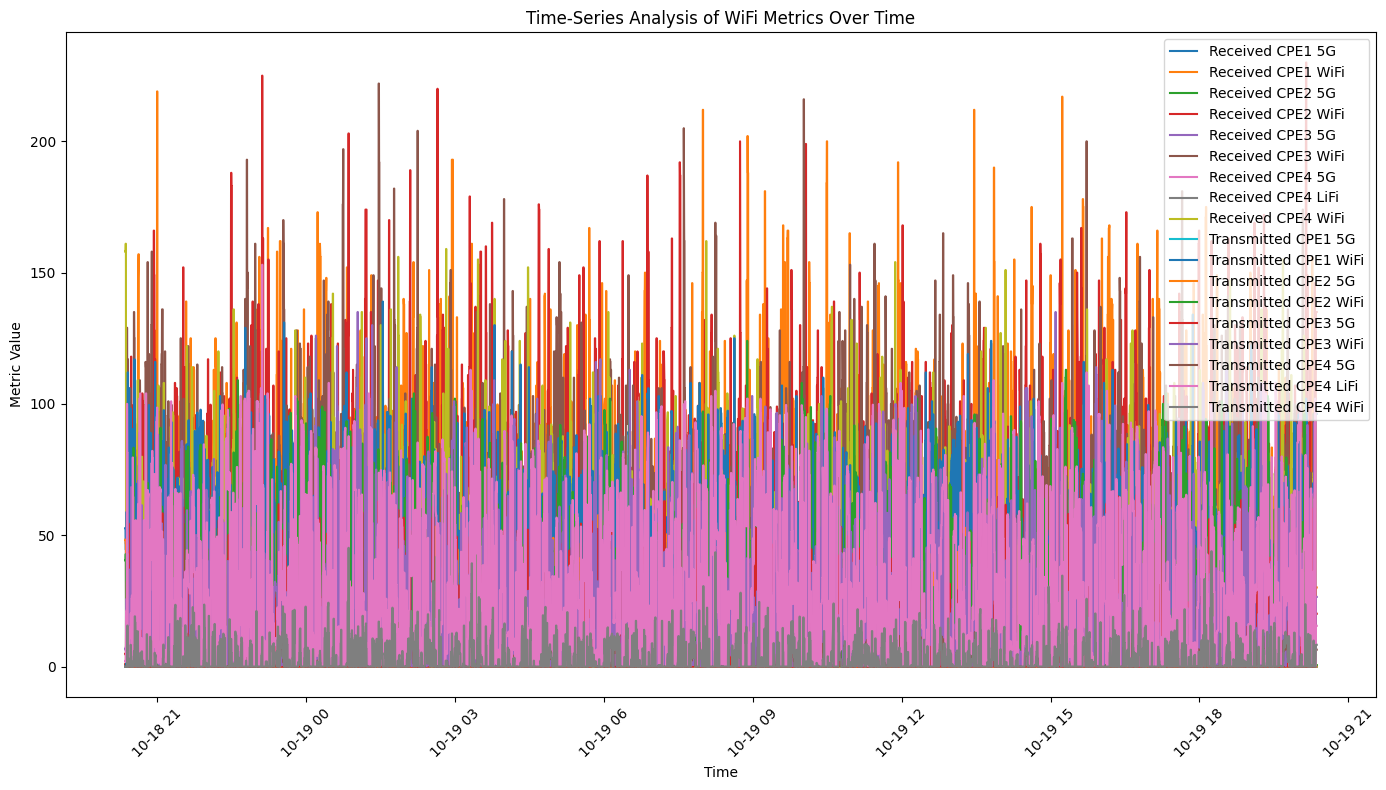

In [24]:
# Convert the 'Time' column to datetime format
all_data_frames['Time'] = pd.to_datetime(all_data_frames['Time'])

# Sort the data by time to ensure proper time-series plotting
all_data_frames = all_data_frames.sort_values('Time')

# Handling missing data: Forward fill to maintain continuity in the time-series
all_data_frames.fillna(method='ffill', inplace=True)

# Now let's plot the key metrics (rxBytes, txBytes, signalAvg) over time for each device
import matplotlib.pyplot as plt

metrics = {
    "recv_CPE1_5G": "Received CPE1 5G",
    "recv_CPE1_wifi": "Received CPE1 WiFi",
    "recv_CPE2_5G": "Received CPE2 5G",
    "recv_CPE2_wifi": "Received CPE2 WiFi",
    "recv_CPE3_5G": "Received CPE3 5G",
    "recv_CPE3_wifi": "Received CPE3 WiFi",
    "recv_CPE4_5G": "Received CPE4 5G",
    "recv_CPE4_lifi": "Received CPE4 LiFi",
    "recv_CPE4_wifi": "Received CPE4 WiFi",
    "trans_CPE1_5G": "Transmitted CPE1 5G",
    "trans_CPE1_wifi": "Transmitted CPE1 WiFi",
    "trans_CPE2_5G": "Transmitted CPE2 5G",
    "trans_CPE2_wifi": "Transmitted CPE2 WiFi",
    "trans_CPE3_5G": "Transmitted CPE3 5G",
    "trans_CPE3_wifi": "Transmitted CPE3 WiFi",
    "trans_CPE4_5G": "Transmitted CPE4 5G",
    "trans_CPE4_lifi": "Transmitted CPE4 LiFi",
    "trans_CPE4_wifi": "Transmitted CPE4 WiFi"
}

# Create plots for each metric over time
plt.figure(figsize=(14, 8))
for column, label in metrics.items():
    plt.plot(all_data_frames['Time'], all_data_frames[column], label=label)

plt.xlabel('Time')
plt.ylabel('Metric Value')
plt.title('Time-Series Analysis of WiFi Metrics Over Time')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

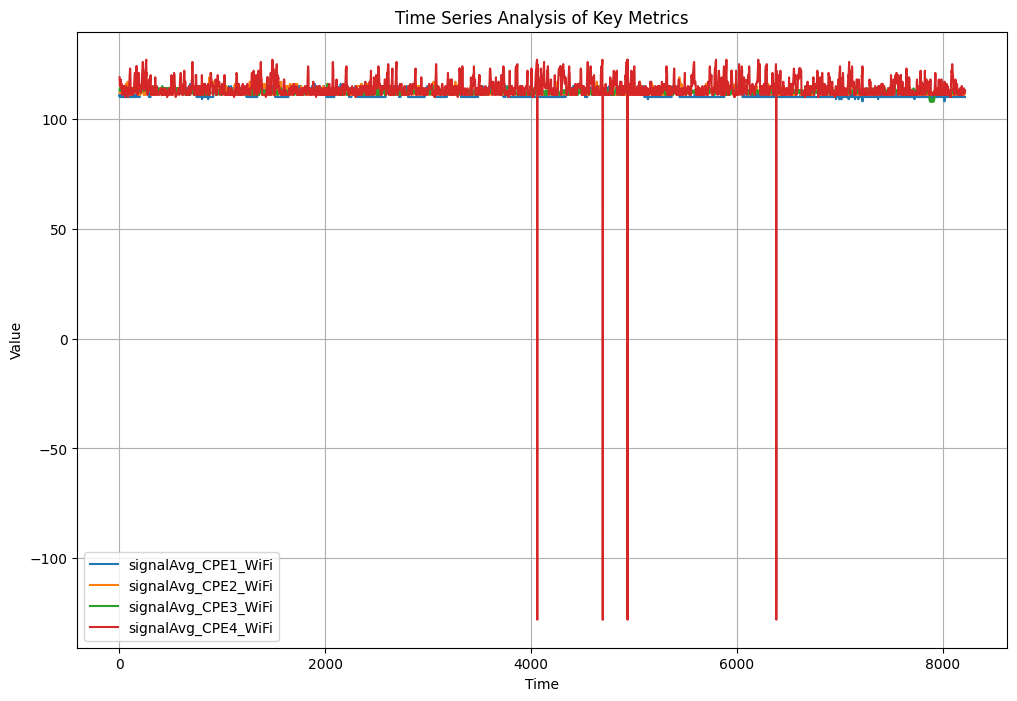

In [25]:
# Define key metrics to plot
metrics_to_plot = ['signalAvg_CPE1_WiFi',
                   'signalAvg_CPE2_WiFi',
                   'signalAvg_CPE3_WiFi',
                    'signalAvg_CPE4_WiFi']

# Plotting time series data for key metrics
plt.figure(figsize=(12, 8))

for metric in metrics_to_plot:
    if metric in all_data_frames.columns:
        all_data_frames[metric].plot(label=metric)

plt.title('Time Series Analysis of Key Metrics')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
data = pd.read_csv('./all_data_frames_merged_per_10s.csv')

In [36]:

# Convert 'Time' column to datetime
data['Time'] = pd.to_datetime(data['Time'])

# Find and print duplicate timestamps in the 'Time' column
duplicate_times = data[data.duplicated(subset='Time', keep=False)]

# Group by 'Time' to check if rows with the same timestamp are identical
identical_check_results = []

for time, group in duplicate_times.groupby('Time'):
    # Check if all rows in this group are identical (excluding 'Time' column)
    identical = group.drop(columns=['Time']).nunique().eq(1).all()
    identical_check_results.append({'Time': time, 'All_Columns_Identical': identical})

# Create a DataFrame to show the results of the identical check
identical_check_df = pd.DataFrame(identical_check_results)

identical_check_df

""


In [37]:

############################## Process Time #######################################
# Convert 'Time' column to datetime if it's not already
data['Time'] = pd.to_datetime(data['Time'])

# Set 'Time' as the DataFrame index
data.set_index('Time', inplace=True)

# Create a complete time range with a frequency of 1 second
full_time_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='s')

# Reindex the DataFrame to include the complete time range
data = data.reindex(full_time_range)

# Reset the index to move 'Time' back to a column
data = data.reset_index().rename(columns={'index': 'Time'})
##################################################################################
# data
data.iloc[1000:1050, :]

,Time,payload_data_bbmod1_temp3 5G,payload_data_bbmod1_temp1 5G,payload_data_bbmod1_temp2 5G,Total 5G Cell Uplink Traffic,Total 5G Cell Downlink Traffic,payload_data_rmod_power 5G,inactiveTime_CPE3_WiFi,inactiveTime_CPE1_WiFi,inactiveTime_CPE2_WiFi,...,recv_CPE3_5G,recv_CPE4_5G,recv_CPE2_wifi,recv_CPE4_lifi,trans_CPE4_5G,trans_CPE4_wifi,trans_CPE2_wifi,trans_CPE3_wifi,recv_CPE3_wifi,trans_CPE1_wifi
1000,2024-10-18 20:37:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,2024-10-18 20:37:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,2024-10-18 20:37:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,2024-10-18 20:37:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,2024-10-18 20:37:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,2024-10-18 20:37:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1006,2024-10-18 20:37:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,2024-10-18 20:37:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,2024-10-18 20:37:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,2024-10-18 20:37:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
NaN_clear_columns = [
                    'payload_data_bbmod1_temp3 5G','payload_data_bbmod1_temp2 5G','payload_data_bbmod1_temp1 5G','payload_data_rmod_power 5G',
                    'inactiveTime_CPE4_WiFi','inactiveTime_CPE3_WiFi','inactiveTime_CPE1_WiFi','inactiveTime_CPE2_WiFi',
                    'signalAvg_CPE4_WiFi','signalAvg_CPE3_WiFi','signalAvg_CPE1_WiFi','signalAvg_CPE2_WiFi',
                    'txBytes_CPE3_WiFi','txBytes_CPE4_WiFi','txBytes_CPE1_WiFi','txBytes_CPE2_WiFi',
                    'rxBytes_CPE4_WiFi','rxBytes_CPE2_WiFi','rxBytes_CPE3_WiFi','rxBytes_CPE1_WiFi',
                    'rxBytes_CPE4_LiFi','txBytes_CPE4_LiFi','signal_CPE4_LiFi'
]

# Apply forward fill to the specified columns
cleared_NaN_data = data.copy()
cleared_NaN_data[NaN_clear_columns] = cleared_NaN_data[NaN_clear_columns].fillna(method='ffill')

cleared_NaN_data

/tmp/ipykernel_3462974/539447632.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleared_NaN_data[NaN_clear_columns] = cleared_NaN_data[NaN_clear_columns].fillna(method='ffill')


,Time,payload_data_bbmod1_temp3 5G,payload_data_bbmod1_temp1 5G,payload_data_bbmod1_temp2 5G,Total 5G Cell Uplink Traffic,Total 5G Cell Downlink Traffic,payload_data_rmod_power 5G,inactiveTime_CPE3_WiFi,inactiveTime_CPE1_WiFi,inactiveTime_CPE2_WiFi,...,recv_CPE3_5G,recv_CPE4_5G,recv_CPE2_wifi,recv_CPE4_lifi,trans_CPE4_5G,trans_CPE4_wifi,trans_CPE2_wifi,trans_CPE3_wifi,recv_CPE3_wifi,trans_CPE1_wifi
0,2024-10-18 20:21:00,NaN,NaN,NaN,6.59,0.12,NaN,NaN,NaN,NaN,...,0.121,0.0,0.79,0.00048,0.0,0.0,40.4,6.51,0.276,52.7
1,2024-10-18 20:21:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-10-18 20:21:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-10-18 20:21:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-10-18 20:21:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86455,2024-10-19 20:21:55,54.2,64.3,53.5,NaN,NaN,41.8,194.0,142.0,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86456,2024-10-19 20:21:56,54.2,64.3,53.5,NaN,NaN,41.8,194.0,142.0,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86457,2024-10-19 20:21:57,54.2,64.3,53.5,NaN,NaN,41.8,194.0,142.0,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86458,2024-10-19 20:21:58,54.2,64.3,53.5,NaN,NaN,41.8,194.0,142.0,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
trans_recv_columns = [
    'trans_CPE3_5G', 'trans_CPE4_5G', 'trans_CPE3_wifi', 'trans_CPE2_wifi', 'trans_CPE4_wifi',
    'trans_CPE1_5G', 'trans_CPE1_wifi', 'trans_CPE2_5G', 
    'trans_CPE4_lifi',
    'recv_CPE1_5G', 'recv_CPE2_5G','recv_CPE3_5G','recv_CPE4_5G',
    'recv_CPE1_wifi', 'recv_CPE2_wifi', 'recv_CPE3_wifi','recv_CPE4_wifi', 
    'recv_CPE4_lifi'
]

# Find rows where any of the CPE trans columns have non-NaN values
cleared_NaN_data = cleared_NaN_data.dropna(how='any')
# Reset the index and create a new sequential index
cleared_NaN_data.reset_index(drop=True, inplace=True)
cleared_NaN_data

,Time,payload_data_bbmod1_temp3 5G,payload_data_bbmod1_temp1 5G,payload_data_bbmod1_temp2 5G,Total 5G Cell Uplink Traffic,Total 5G Cell Downlink Traffic,payload_data_rmod_power 5G,inactiveTime_CPE3_WiFi,inactiveTime_CPE1_WiFi,inactiveTime_CPE2_WiFi,...,recv_CPE3_5G,recv_CPE4_5G,recv_CPE2_wifi,recv_CPE4_lifi,trans_CPE4_5G,trans_CPE4_wifi,trans_CPE2_wifi,trans_CPE3_wifi,recv_CPE3_wifi,trans_CPE1_wifi
0,2024-10-18 20:21:30,61.5,64.8,45.6,55.800000,0.62400,41.7,25.30,6.670,6.17,...,0.11900,0.000,0.489,0.00048,0.00,0.00,42.800,7.300,0.2760,44.600
1,2024-10-18 20:22:00,67.0,44.4,64.5,56.800000,0.53800,41.7,15.70,136.000,2.33,...,0.04860,0.000,21.100,0.00048,0.00,0.00,10.100,6.060,24.5000,0.157
2,2024-10-18 20:22:30,52.4,54.8,65.8,16.900000,0.22200,42.5,3.33,100.000,3.33,...,0.25800,0.000,61.500,0.00048,0.00,0.00,11.900,25.800,81.5000,58.900
3,2024-10-18 20:23:00,64.3,61.6,64.8,22.600000,0.38700,42.5,3.00,4.500,4.67,...,0.28800,0.000,43.400,0.00048,0.00,0.00,15.300,7.380,129.0000,37.600
4,2024-10-18 20:23:30,59.6,53.2,62.4,23.900000,0.30800,42.4,3.67,4.670,5.57,...,0.46500,0.148,93.200,0.31900,7.17,15.60,1.150,43.000,17.9000,17.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,2024-10-19 20:19:00,57.0,61.4,65.7,30.200000,0.13800,41.9,4.17,3.170,8.33,...,0.00000,0.000,64.100,0.01300,0.00,0.00,12.300,92.900,45.2000,0.159
2845,2024-10-19 20:19:30,46.9,64.4,44.4,5.230000,0.02430,42.2,10.00,3.170,5.00,...,0.00345,0.000,146.000,0.01290,0.00,0.00,0.158,15.600,0.0528,94.200
2846,2024-10-19 20:20:00,65.5,52.7,53.0,0.000301,0.00023,42.2,179.00,0.500,3.65,...,0.00000,0.000,102.000,0.00048,0.00,0.00,0.157,0.158,102.0000,96.000
2847,2024-10-19 20:20:30,46.8,63.7,63.1,0.000041,0.00000,41.9,2.57,0.857,4.80,...,0.00000,0.000,96.200,0.00048,0.00,0.00,4.120,0.158,4.3500,95.900


In [40]:
cleared_NaN_data.to_csv('./all_data_frames_merged_per_30s.csv', index=False)